#Redes Neuronales - Trabajo Práctico Número 1
#Autor: Franco Scapolla

# Notebook 1: Análisis de datos

En esta primera notebook, se realiza un análisis exploratorio de los datos (o EDA por sus siglas en inglés), para poder observar cómo se comportan las variables o características empleadas para la clasificación. El dataset con el que se trabajará es Fashion-MNIST, que consta de 60000 imágenes, cada una de 28x28 en escala de grises. Las imágenes son de prendas de ropa, y pueden pertenecer a alguna de las siguientes 10 clases:
* 0: T-shirt/top
* 1: Trouser
* 2: Pullover
* 3: Dress
* 4: Coat
* 5: Sandal
* 6: Shirt
* 7: Sneaker
* 8: Bag
* 9: Ankle boot

# 1.1 Importe de librerías y carga y preprocesamiento de datos

In [25]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns

In [26]:
#Se cargan los datos de entrenamiento (si uno quiere correr la notebook por su cuenta, modificar acá el path para que levante las imágenes desde donde corresponda).
x_train = np.load("/content/drive/MyDrive/Redes Neuronales/TP1/train_images.npy")

In [27]:
#Se verifica que efectivamente estén las 60000 imágenes de entrenamiento de 28 x 28.
x_train.shape

(60000, 28, 28)

In [28]:
#Se cargan los labels asociados a los datos de entrenamiento (también modificar el path según corresponda acá en cado de querer correr la notebook).
y_train = pd.read_csv("/content/drive/MyDrive/Redes Neuronales/TP1/train_labels.csv")

In [29]:
#Se observa la forma de los labels, que son básicamente un número entre cero y nueve según la categoría a la que pertenece la imagen.
y_train

,label
0,9
1,0
2,0
3,3
4,0
...,...
59995,5
59996,1
59997,3
59998,0


In [30]:
#Creo una lista con las distintas clases por comodidad.
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

# 1.2 Normalización de datos

Ahora me interesa normalizar los datos de entrenamiento. En este caso en realidad no es estrictamente necesario ya que todas las instancias son iguales (imágenes de 28 x 28, donde cada píxel es un valor entre 0 y 255). Sin embargo, lo correcto en general es normalizar los datos, por lo que se hace aquí también.\
Para esto simplemente se divide por 255.0 para conseguir intensidades entre cero y uno.

In [31]:
x_train_scaled = x_train / 255.0

# 1.3 Visualización de algunas instancias

Ahora me interesa visualizar algunas instancias. Para ello, imprimo las primeras 30 imágenes con los labels correspondientes, usando matplotlib.

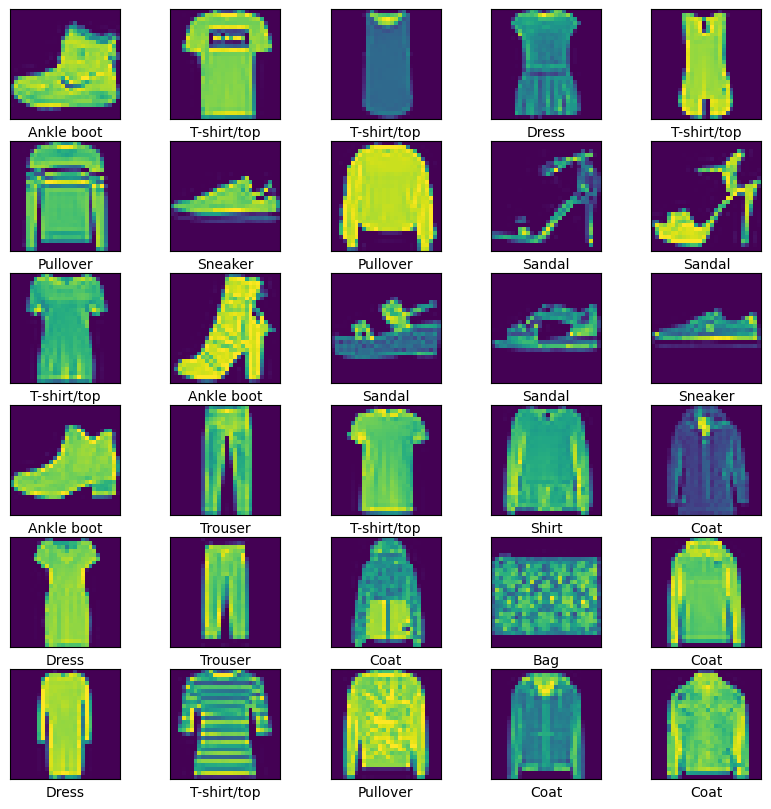

In [8]:
plt.figure(figsize = (10,10))
for i in range(30):
    plt.subplot(6,5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_train_scaled[i])
    plt.xlabel(class_names[y_train.label.iloc[i]])

# 1.4 Distribución de clases

Me interesa ver cómo se distribuyen las 10 clases entre las 60000 imágenes de entrenamiento.


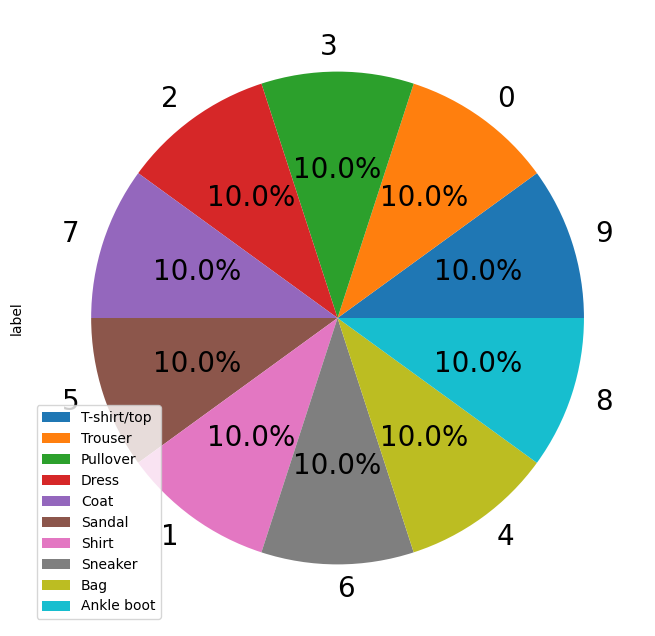

In [9]:
plot = y_train['label'].value_counts().plot(
    kind='pie', 
    autopct="%.1f%%", 
    fontsize=20, 
    figsize=(8, 8),
    use_index=False
)
plt.legend(class_names, loc="lower left")
plt.show()

Se ve que hay exactamente 6000 imágenes de cada clase, de forma que cada clase tiene una distribución del 10%.

# 1.5 Histrograma de la distribución de intensidades para cada clase

En primer lugar, separo el arreglo original de 60000 imágenes en 10 arreglos de 6000 imágenes cada uno, donde cada uno tiene todas las imágenes correspondientes a una sola clase.

In [39]:
#(Referencia: https://stackoverflow.com/questions/63989853/how-to-split-the-dataframe-into-sub-dataframes-according-to-different-groups)
class_arrays = []
for i in range(10):
    class_i_indices = np.where(y_train['label'] == i)[0]
    class_i_images = x_train[class_i_indices]
    class_arrays.append(class_i_images)

for i in range(10):
    print(f"Class {i} shape: {class_arrays[i].shape}")

Class 0 shape: (6000, 28, 28)
Class 1 shape: (6000, 28, 28)
Class 2 shape: (6000, 28, 28)
Class 3 shape: (6000, 28, 28)
Class 4 shape: (6000, 28, 28)
Class 5 shape: (6000, 28, 28)
Class 6 shape: (6000, 28, 28)
Class 7 shape: (6000, 28, 28)
Class 8 shape: (6000, 28, 28)
Class 9 shape: (6000, 28, 28)


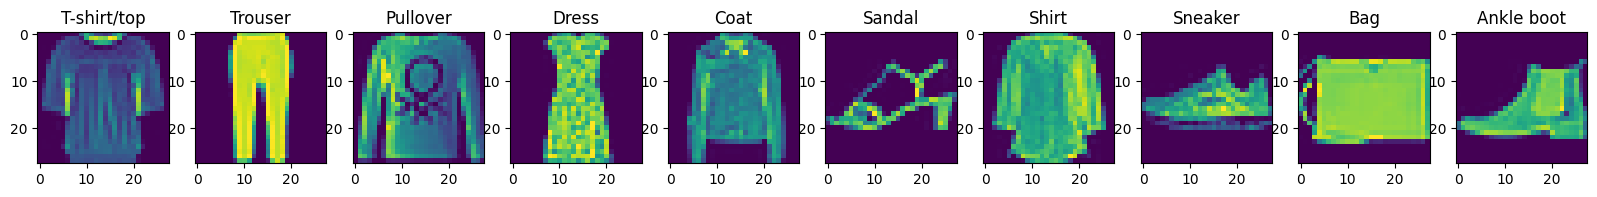

In [40]:
fig, axs = plt.subplots(1, 10, figsize=(20, 2))

for i in range(10):
    #Para cada clase imprimo una imagen aleatoria, para ver que efectivamente se hayan separado bien
    image = class_arrays[i][np.random.randint(class_arrays[i].shape[0])]
    axs[i].imshow(image)
    axs[i].set_title(f"{class_names[i]}")

plt.show()

Ahora realizó los histogramas de las intensidades de cada clase usando la librería seaborn.

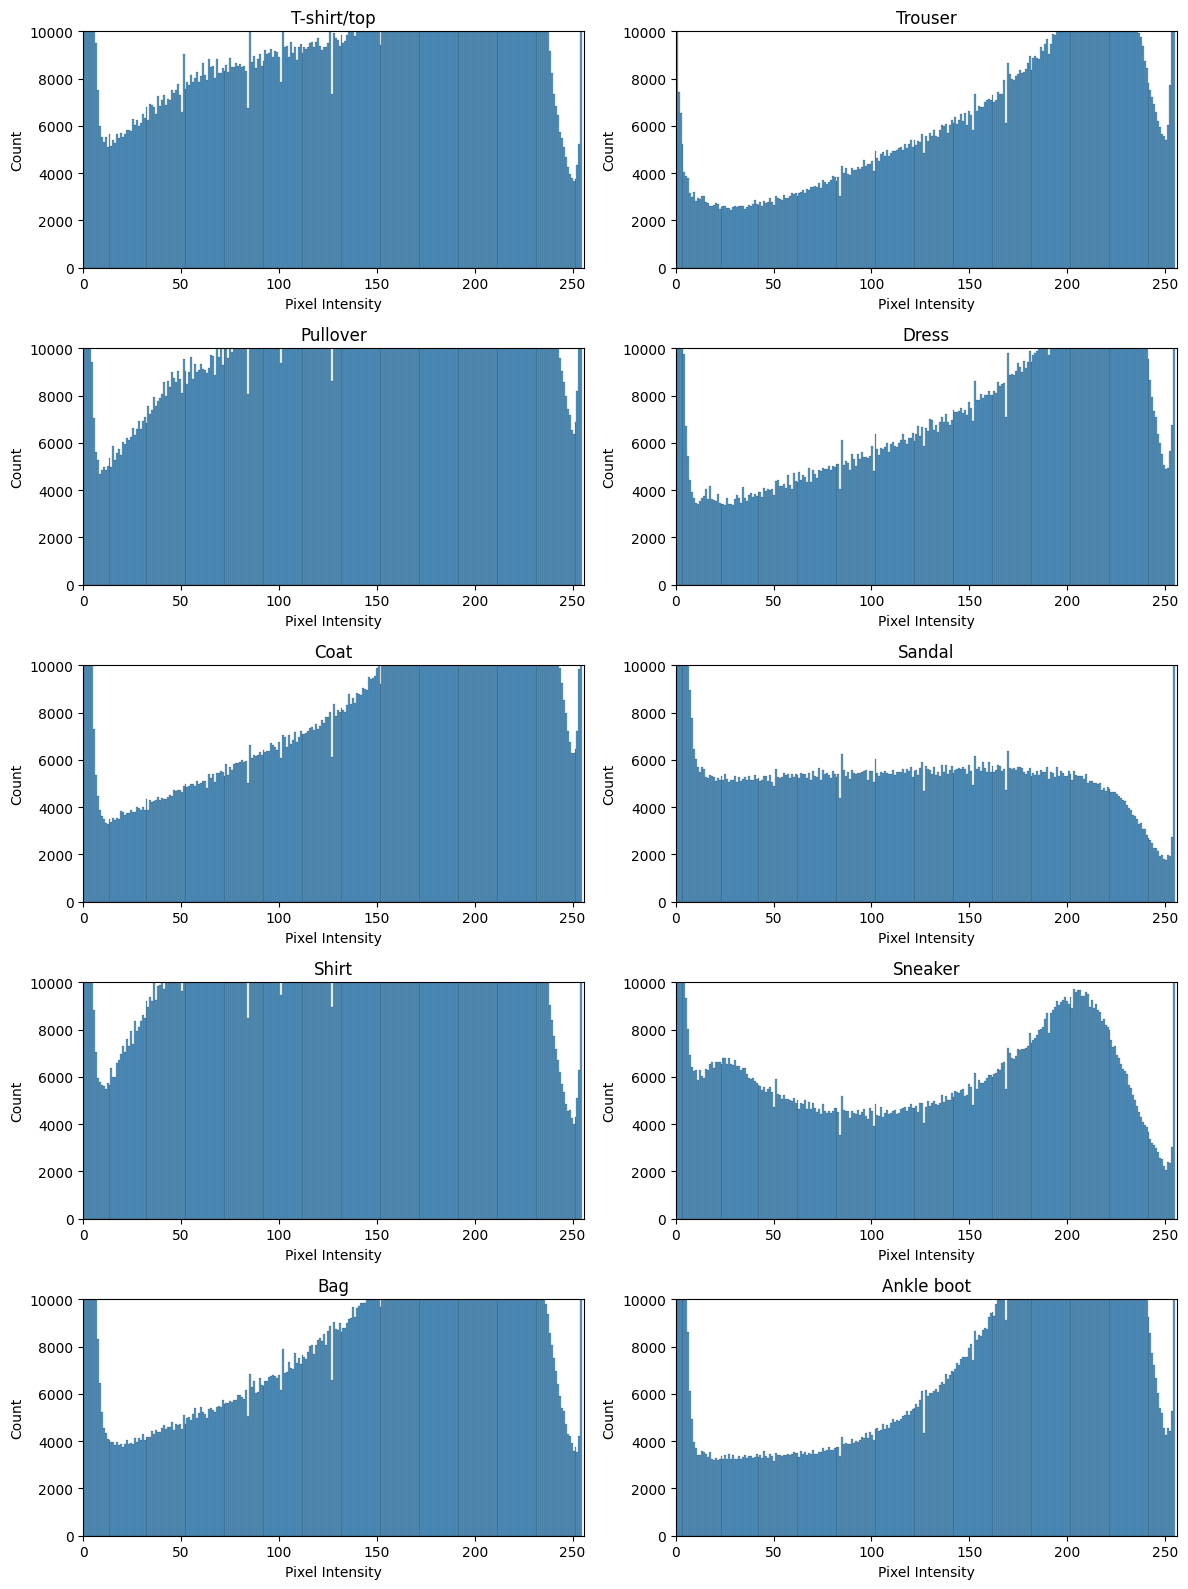

In [48]:
#(Referencias: https://seaborn.pydata.org/generated/seaborn.histplot.html / https://stackoverflow.com/questions/75635729/how-to-set-multiple-histograms-in-a-facetgrid)
fig, axs = plt.subplots(5, 2, figsize=(12, 16))
axs = axs.ravel()

for i in range(10):
    sns.histplot(class_arrays[i].ravel(), bins=256, ax=axs[i])
    axs[i].set_title(class_names[i])
    axs[i].set_xlim(0, 256)
    axs[i].set_ylim(0, 10000)
    axs[i].set_xlabel('Pixel Intensity')
    axs[i].set_ylabel('Count')

plt.tight_layout()
plt.show()

Ahora realizó los histogramas de las intensidades de cada clase usando la librería seaborn.

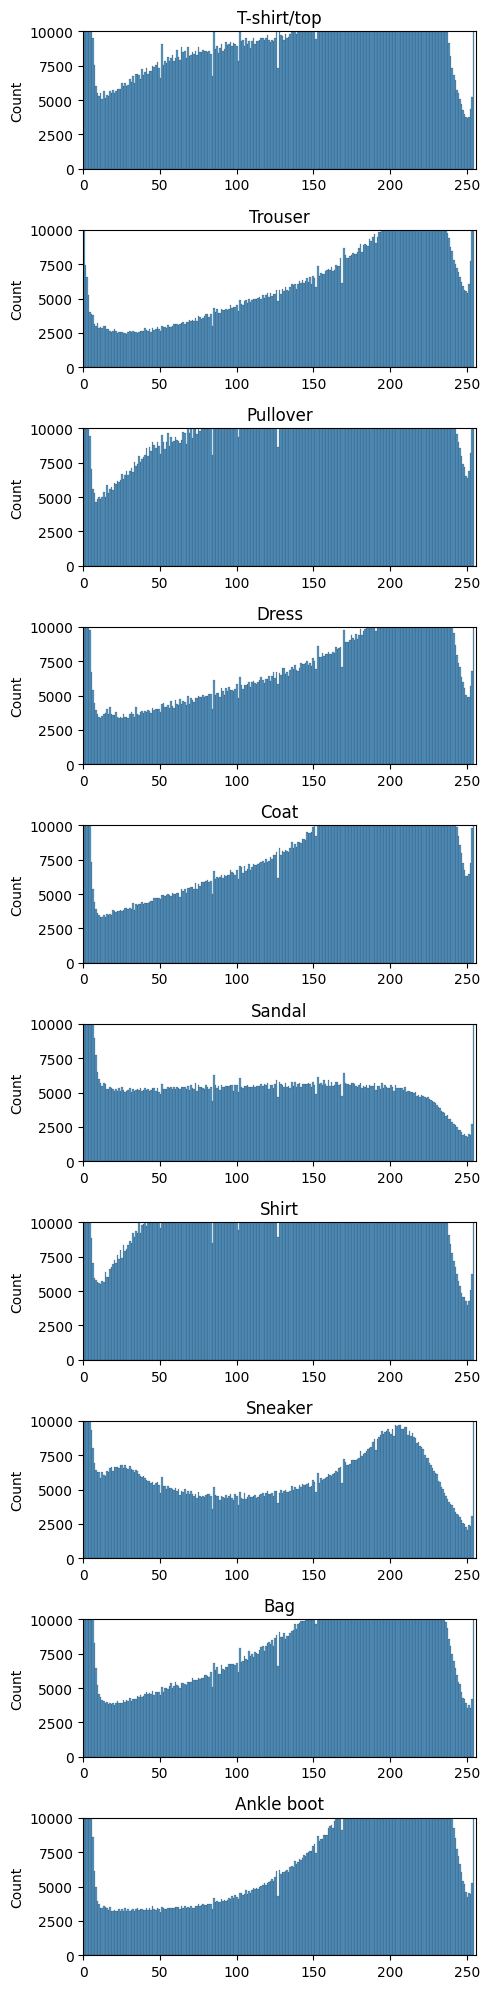

In [47]:
#(Referencias: https://seaborn.pydata.org/generated/seaborn.histplot.html / https://stackoverflow.com/questions/75635729/how-to-set-multiple-histograms-in-a-facetgrid)
fig, axs = plt.subplots(10, 1, figsize=(5, 20))

for i in range(10):
    pixels = class_arrays[i].ravel()
    sns.histplot(pixels, bins=256, ax=axs[i], kde=False)
    axs[i].set_xlim(0, 256)
    axs[i].set_ylim(0, 10000)
    axs[i].set_title(f"{class_names[i]}")

plt.tight_layout()
plt.show()


Ahora lo que voy a hacer es calcular una imagen "promedio" para cada clase.

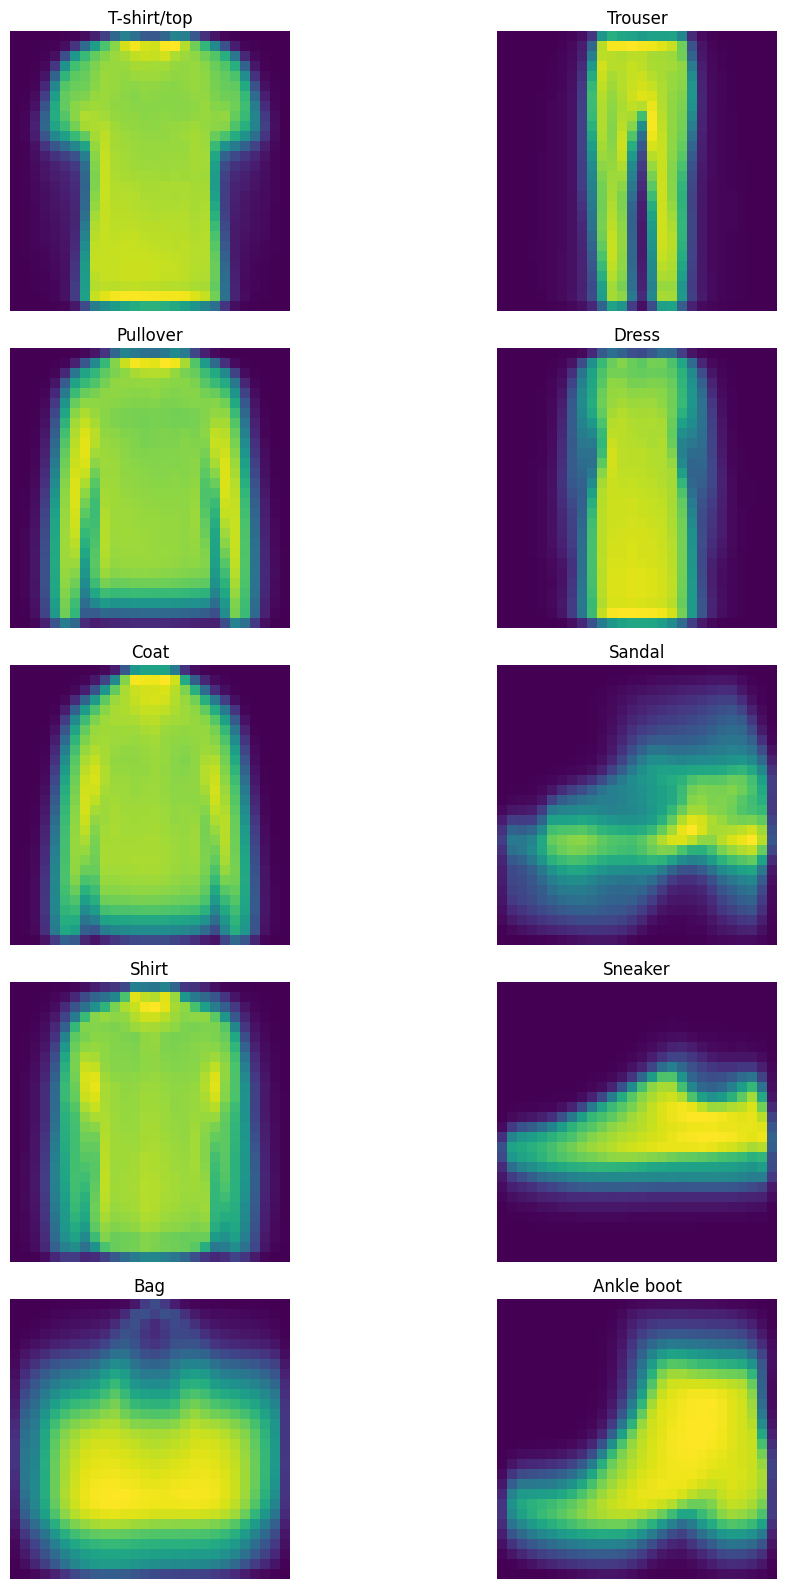

In [51]:
mean_images = []
for i in range(10):
    mean_image = np.mean(class_arrays[i], axis=0)
    mean_images.append(mean_image)

fig, axs = plt.subplots(5, 2, figsize=(12, 16))
axs = axs.ravel()

for i in range(10):
    axs[i].imshow(mean_images[i])
    axs[i].set_title(class_names[i])
    axs[i].axis('off')

plt.tight_layout()
plt.show()